# ALU implementation using a Quantum Circuit
by Duicu Laurentiu Daniel

## 1.Intro

An important component in standard hardware is the implementation of an ALU which would realise the basic operations needed for everything from basic logical operations to arithmetical ones in order to execute higher order operations by separating them.

## 2. Problem Statemnent

In quantum circuits a basic ALU would be needed in order to accomplish higher order operations and to be able to encapsulate unitary operations which are the basis of quantum algorithms[2].

## 3.Implementation

 The implemented ALU would be a simplified version consisting of encapsulating an operation on 1 qubit.
 The basic inputs would be the 2 input qubits and a carryin/reduce qubit and selection qubits to select the operations and some clean qubits which would be used in the process.
 
 The output would need to give enough information in order to be able to reconstruct the inputs so the 2 input qubits must also be an output and the substract/carry in qubit would be converted to a carryout/subsctract_nxt qubit [1].
 
 Another output would be the result of the operation.  And also in order to be able to detect the operation the selection qubits need to be present as an output.
 
 A basic goal of a quantum circuit would be the reversible aspect so the flow of the circuit could be reversed and the inputs reproduced.

<img src="circuitdiag.png">

<img src="ALUchained.png">


\begin{equation*}
\Delta t moudule = 32d
\end{equation*}
\begin{equation*}
No.qubits=2(selection)+1(cleanqubit)+2*N(inputs)+N(cins)+N(outputs)+1(Coutfinal)
        =4*N+4qubits
\end{equation*}
N-number of modules in chain
ex: N=8 => 36 qubits

## 4.Annotated code 

In [2]:
from qiskit import IBMQ
IBMQ.save_account('3eac650ba2ac4a1083fda7984b8f6cd0516c4fbb0c098c58ab33d44f659893a1ab1169d9f00486ecdf8334cef9e8d065e3f705ce52c942af154db619a22d81af',overwrite=True)
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [3]:
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [4]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) #Carry in

#circuit.x(3)
#circuit.x(4)
circuit.h(q[3])
circuit.h(q[4])

circuit.barrier(q)

circuit.cx(0,5)
circuit.cx(1,5) #I4 = A xor B
 # AB 43
circuit.ccx(3,4,6)
circuit.ccx(5,6,7) # Output 
circuit.ccx(3,4,6)
circuit.cx(1,5)
circuit.cx(0,5)

circuit.barrier(q)

circuit.x(0)
circuit.x(1)
circuit.ccx(0,1,5) 
circuit.x(5)  # I3 = A or B
circuit.x(3) # A!B 4!3
circuit.ccx(3,4,6)
circuit.ccx(5,6,7) # Output
circuit.ccx(3,4,6)
circuit.x(5)
circuit.ccx(0,1,5)
circuit.x(0)
circuit.x(1)

circuit.barrier(q)

#circuit.cx(0,1)
circuit.ccx(0,1,5) #I2 = A and B
circuit.x(3) # !AB !43
circuit.x(4)
circuit.ccx(3,4,6)
circuit.ccx(5,6,7) # Output
circuit.ccx(3,4,6)
circuit.ccx(0,1,5)
#circuit.cx(0,1)

circuit.barrier(q)

circuit.ccx(0,1,5)
circuit.cx(0,1)
circuit.ccx(1,2,5) 
circuit.cx(1,2)
#I1 = A+B+Cin
circuit.x(3) # !A!B !4!3
circuit.ccx(3,4,6)
circuit.ccx(2,6,7) # Output 2-sum
circuit.ccx(3,4,6)
circuit.cx(5,6)
circuit.cx(1,2)
circuit.ccx(1,2,5)
circuit.cx(0,1)
circuit.ccx(0,1,5)

circuit.x(3)
circuit.x(4)




circuit.measure(q,c)

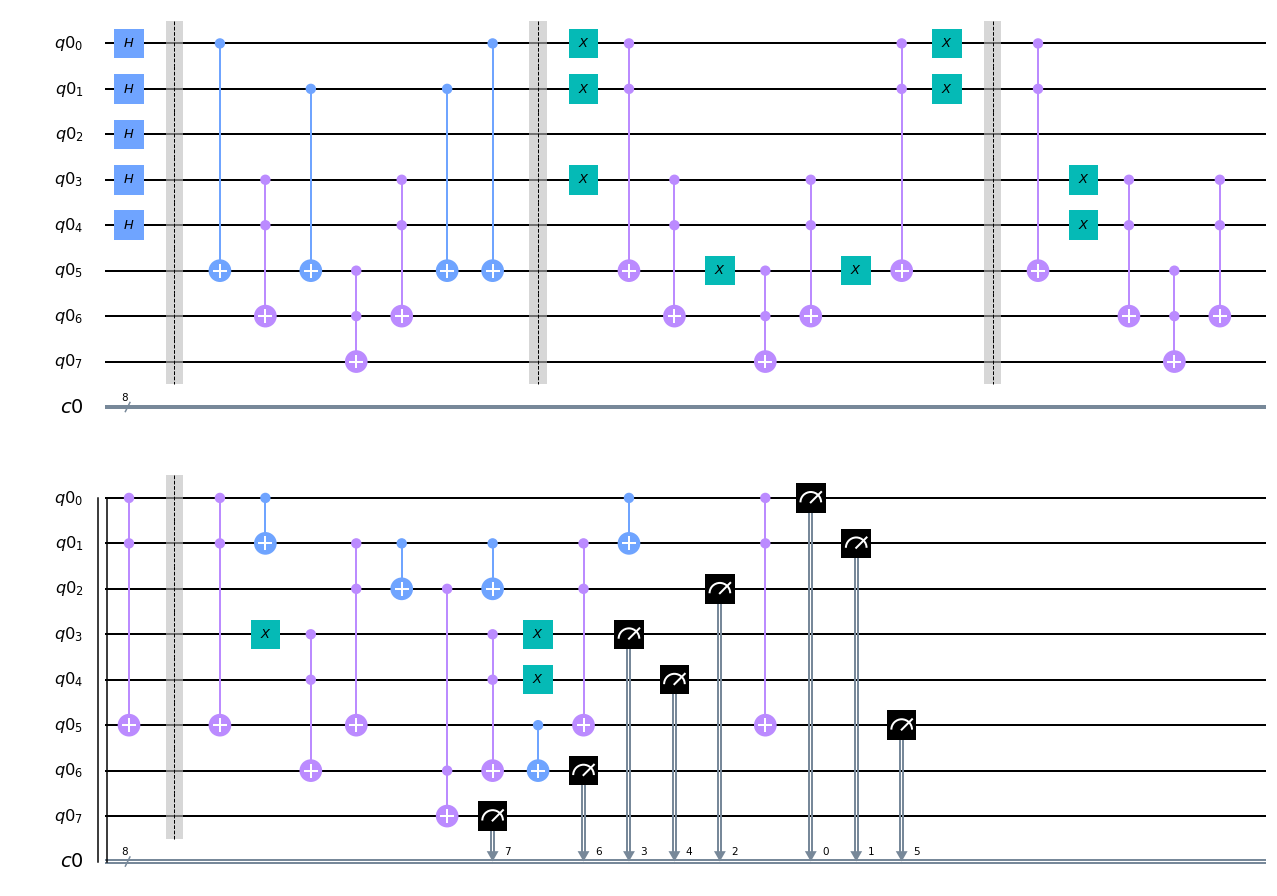

In [5]:
circuit.draw(output="mpl")

|Selection|Operation|
|----|------|
|00 | sum|
|01 | and|
|10 | or|
|11 | xor|

|Inputs |Outputs|
|-------|-------|
|0 - X  |0 - X  |
|1 - Y  |1 - Y  |
|2 - Cin|2 - Cin|
|3 - A  |3 - A  |
|4 - B  |4 - B  |
|5 - 0  |5 - 0  |
|6 - 0  |6 - Cout|
|7 - 0  |7 - Z  |


Total count are:
01000110 -> 45
11011101 -> 43
10000100 -> 41
10011001 -> 39
10000010 -> 39
00010000 -> 36
10011010 -> 35
11000111 -> 35
10010001 -> 35
00001000 -> 34
11010101 -> 34
11010011 -> 33
11001011 -> 32
00001100 -> 31
00000000 -> 31
11001111 -> 31
01000011 -> 31
10000001 -> 31
01011011 -> 31
11010110 -> 30
10010010 -> 29
00010100 -> 28
00001001 -> 27
01001101 -> 27
11010111 -> 27
01001110 -> 26
01011111 -> 26
11011110 -> 24
00011100 -> 24
01000101 -> 23
00001010 -> 21
00011000 -> 21


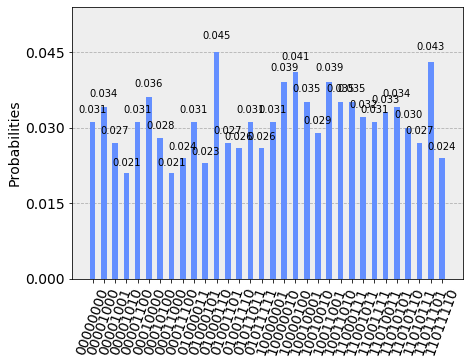

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count are:")#,counts)
sorted_x = sorted(counts.items(), key=lambda kv: kv[1],reverse=True)
import collections
sorted_dict = collections.OrderedDict(sorted_x)
for cnt in sorted_dict.keys():
    print(str(cnt)+" -> "+str(sorted_dict[cnt]))
plot_histogram(counts)

In [12]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [13]:
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [14]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')

In [15]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(circuit, backend=backend_sim)
job_monitor(job_exp)

Job Status: job has successfully run


In [16]:
result_exp = job_exp.result()

In [17]:
#print(result_exp)

In [18]:
counts_exp = result_exp.get_counts()
print("\nTotal count are:")#,counts)
sorted_x_exp = sorted(counts_exp.items(), key=lambda kv: kv[1],reverse=True)
import collections
sorted_dict_exp = collections.OrderedDict(sorted_x_exp)
for cnt_exp in sorted_dict_exp.keys():
    print(str(cnt_exp)+" -> "+str(sorted_dict_exp[cnt_exp]))


Total count are:
01000110 -> 39
01011111 -> 39
00011000 -> 39
10011001 -> 38
01011011 -> 38
10000010 -> 37
11001011 -> 37
11010110 -> 36
10011010 -> 36
11010101 -> 36
00010000 -> 35
00000000 -> 35
11001111 -> 35
00001100 -> 34
00001000 -> 34
00001010 -> 34
00011100 -> 33
00010100 -> 33
11010111 -> 32
10000100 -> 32
01000011 -> 31
00001001 -> 29
10010010 -> 28
01001101 -> 28
01000101 -> 28
01001110 -> 26
10010001 -> 26
11011110 -> 25
11000111 -> 24
11010011 -> 23
10000001 -> 23
11011101 -> 21


In [19]:
print(counts_exp)

{'11011110': 25, '10010010': 28, '00011100': 33, '00010100': 33, '11010011': 23, '01000110': 39, '10011001': 38, '00001100': 34, '11011101': 21, '11010110': 36, '00001001': 29, '00001000': 34, '01001110': 26, '00010000': 35, '01001101': 28, '00000000': 35, '11001111': 35, '10011010': 36, '01000101': 28, '11000111': 24, '00001010': 34, '10010001': 26, '01000011': 31, '10000010': 37, '01011111': 39, '00011000': 39, '10000001': 23, '11010111': 32, '11001011': 37, '11010101': 36, '10000100': 32, '01011011': 38}


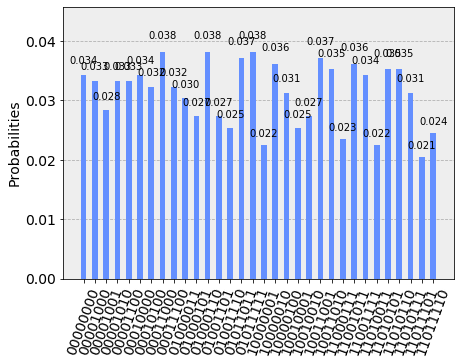

In [20]:
plot_histogram(counts_exp)

In [21]:
backend = provider.get_backend('ibmq_16_melbourne')

In [22]:
from qiskit.tools.monitor import job_monitor

job_exp_real = execute(circuit, backend=backend)
job_monitor(job_exp_real)

Job Status: job has successfully run


In [23]:
result_exp_real = job_exp_real.result()

In [24]:
print(result_exp_real)

Result(backend_name='ibmq_16_melbourne', backend_version='2.0.0', date=datetime.datetime(2020, 1, 10, 16, 41, 21, tzinfo=datetime.timezone.utc), execution_id='0487819c-33c8-11ea-9a6e-002590bdc3da', header=Obj(backend_name='ibmq_16_melbourne', backend_version='2.0.0'), job_id='5e18a8f58c74d00011794a42', qobj_id='9474e46e-7f6e-43dc-ae04-d94d7871c13f', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=35, 0x1=3, 0x10=24, 0x11=10, 0x12=21, 0x13=8, 0x14=10, 0x15=3, 0x16=12, 0x17=3, 0x18=8, 0x19=4, 0x1a=7, 0x1c=1, 0x1e=3, 0x1f=3, 0x2=23, 0x20=33, 0x21=5, 0x22=28, 0x23=7, 0x24=5, 0x25=2, 0x26=15, 0x27=3, 0x28=10, 0x29=3, 0x2a=10, 0x2b=3, 0x2c=5, 0x2e=1, 0x2f=1, 0x3=8, 0x30=29, 0x31=8, 0x32=23, 0x33=9, 0x34=8, 0x35=5, 0x36=9, 0x37=3, 0x38=7, 0x39=1, 0x3a=6, 0x3b=2, 0x3c=6, 0x3d=1, 0x3e=3, 0x4=7, 0x40=4, 0x41=1, 0x42=4, 0x43=4, 0x45=1, 0x46=1, 0x49=1, 0x4a=1, 0x4c=1, 0x4e=1, 0x5=2, 0x50=2, 0x51=1, 0x52=6, 0x53=2, 0x54=1, 0x56=1, 0x57=2, 0x58=2, 0x5a=4, 0x5c=1, 0x5e=1, 0x5f=1, 0

In [25]:
counts_exp_real = result_exp_real.get_counts()
print("\nTotal count are:")#,counts)
sorted_x_exp_real = sorted(counts_exp_real.items(), key=lambda kv: kv[1],reverse=True)
import collections
sorted_dict_exp_real = collections.OrderedDict(sorted_x_exp_real)
for cnt_exp_real in sorted_dict_exp_real.keys():
    print(str(cnt_exp_real)+" -> "+str(sorted_dict_exp_real[cnt_exp_real]))


Total count are:
00000000 -> 35
00100000 -> 33
10000000 -> 31
10100000 -> 29
00110000 -> 29
00100010 -> 28
00010000 -> 24
00110010 -> 23
00000010 -> 23
00010010 -> 21
10010000 -> 20
10000010 -> 20
10100010 -> 19
00001000 -> 17
10110110 -> 15
00100110 -> 15
10110000 -> 15
10000110 -> 14
10010110 -> 13
10110010 -> 13
00010110 -> 12
10001010 -> 11
00000110 -> 11
10010010 -> 10
00010001 -> 10
10100110 -> 10
00101010 -> 10
00101000 -> 10
00010100 -> 10
10101000 -> 9
00110011 -> 9
00110110 -> 9
10111000 -> 9
00010011 -> 8
00011000 -> 8
00110001 -> 8
10110100 -> 8
00000011 -> 8
10101010 -> 8
00110100 -> 8
00001010 -> 8
01100000 -> 7
10001000 -> 7
00011010 -> 7
00100011 -> 7
00111000 -> 7
10010100 -> 7
00000100 -> 7
10000100 -> 7
00111010 -> 6
11000000 -> 6
01010010 -> 6
10100100 -> 6
00111100 -> 6
10010111 -> 6
10000011 -> 5
00101100 -> 5
11100000 -> 5
00110101 -> 5
00100001 -> 5
01110010 -> 5
10111010 -> 5
00100100 -> 5
11110010 -> 5
10000001 -> 5
10110001 -> 4
01000011 -> 4
01000000 -> 4
0

In [26]:
print(counts_exp_real)

{'01010111': 2, '10000110': 14, '01011100': 1, '10110001': 4, '00010011': 8, '00111010': 6, '10010010': 10, '00011100': 1, '10110110': 15, '11010011': 2, '10101101': 2, '01110011': 1, '00010001': 10, '11100011': 1, '10101000': 9, '10101001': 1, '00010000': 24, '01110110': 1, '00110010': 23, '10000000': 31, '10000011': 5, '01010011': 2, '11111110': 1, '10100110': 10, '01100110': 1, '11000000': 6, '10010001': 2, '01000011': 4, '00100110': 15, '01010010': 6, '10111110': 3, '00101001': 3, '00011000': 8, '11001000': 1, '00000111': 2, '10010101': 1, '10010110': 13, '01010001': 1, '10100010': 19, '00101100': 5, '01000001': 1, '00011110': 3, '01001100': 1, '01000000': 4, '10100100': 6, '11111100': 1, '11010100': 1, '00110001': 8, '00000001': 3, '00001011': 3, '11111000': 1, '01000010': 4, '00001001': 2, '11111010': 2, '00010111': 3, '01001110': 1, '11001010': 2, '11001001': 1, '00110011': 9, '11010010': 2, '11000011': 2, '00000000': 35, '11100000': 5, '10010000': 20, '00110101': 5, '10011010':

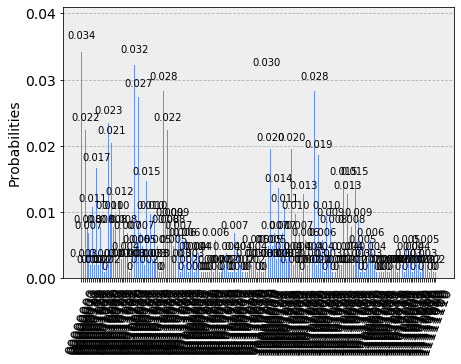

In [27]:
plot_histogram(counts_exp_real)

In [3]:
#backend = Aer.get_backend('statevector_simulator')
#job1 = execute(circuit, backend, shots=1000)
#job1 = execute(circuit, backend, shots=1000)
#result1 = job1.result()

#print(result1)
#outputstate = result1.get_statevector(circuit, decimals=3)
#print(outputstate)

In [7]:
#from qiskit.visualization import plot_state_city
#plot_state_city(outputstate)

## 5.Results

  The implementation of a standard ALU using a quantum circuit wouldn't theoretically provide a complexity reduction compared to a standard implementation using logic gates, to the contrary the complexity would be increased, but still an ALU implementation would be necessary to be implemented using quantum circuits to provide basic operations.
  
  Using an ALU, even  though it requires more qubits than any separate operation by itself, it still requires fewer qubits than the sum total of all operation implementations.
  
  The total number of qubits can be reduced by inverting the operations in certain qubits and outputing a clean qubit which can be used in the next binary ranks.
  
  Using the standard implementation of an adder the position of the carry and the sum output are reversed so in order to clean the operations we would need to apply them and reversed and are only able to copy the sum, not able output the carryout on the previous carryin qubit so the carry in would need to be outputed in each rank.

## 6.References

<ol type="1">
    <li>Steven A. Cuccaro, Thomas G. Draper, Samuel A. Kutin and David Petrie Moulton, A new quantum ripple-carry addition circuit
    <li>Akanksha Dixit and VinodKapse, Arithmetic & Logic Unit (ALU) Design using Reversible Control Unit
</ol>